# Problem Statement

Comcast is an American global telecommunication company.The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

# Data Description

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# EDA

In [196]:
# Read CSV file
comcast_data=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [197]:
comcast_data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [198]:
comcast_data['Date_month_year'] = pd.to_datetime(comcast_data['Date_month_year'])

Splitting Date Month and year in different feature for better understanding and droping Date_month_year and Date Column

In [199]:
comcast_data['year'] = comcast_data['Date_month_year'].dt.year
comcast_data['month'] = comcast_data['Date_month_year'].dt.month
comcast_data['day'] = comcast_data['Date_month_year'].dt.day

In [200]:
comcast_data.drop('Date_month_year',axis=1,inplace=True)

In [162]:
# comcast_data.drop('Date',axis=1,inplace=True)

In [201]:
comcast_data.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Time', 'Received Via',
       'City', 'State', 'Zip code', 'Status', 'Filing on Behalf of Someone',
       'year', 'month', 'day'],
      dtype='object')

In [202]:
comcast_data.shape

(2224, 13)

In [203]:
comcast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
 10  year                         2224 non-null   int64 
 11  month                        2224 non-null   int64 
 12  day                          2224 non-null   int64 
dtypes: int64(4), object(9)
memory usa

By looking above info we can say that there are no NaN values in the given dataset.

In [166]:
comcast_data[comcast_data.duplicated()==True]

,Ticket #,Customer Complaint,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,year,month,day


No complain is duplicated in the given dataset

In [50]:
complainTypes=comcast_data['Customer Complaint'].value_counts().to_frame(name='Frequency')

In [77]:
complainTypes.head()

,Frequency
Comcast,83
Comcast Internet,18
Comcast Data Cap,17
comcast,13
Data Caps,11


By looking above table we can see different types of Complains got from Customers any how many number of times same complaints got.

<AxesSubplot:xlabel='month', ylabel='Count'>

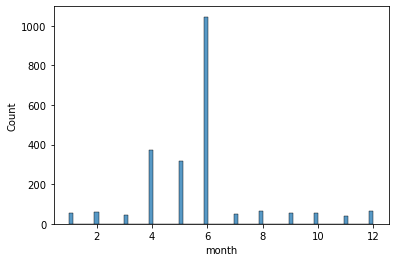

In [68]:

sns.histplot(data=comcast_data,x='month',kde=False)

By looking above histogram we can say that there is higher number of complaints got in June Month or 6th month

<AxesSubplot:xlabel='day', ylabel='Count'>

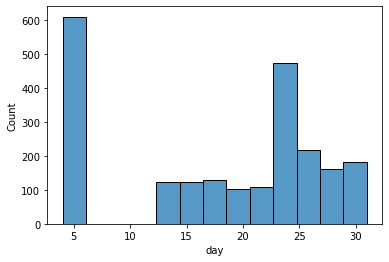

In [69]:

sns.histplot(data=comcast_data,x='day',kde=False)

with above diagram we can say large number of complaints are registered on 5th day of month and then between 23 and 25 th day of month

In [78]:
complainTypes.head()

,Frequency
Comcast,83
Comcast Internet,18
Comcast Data Cap,17
comcast,13
Data Caps,11


we can see above Comcast,Internet and data Caps these are the category for which mostly complaints has been registered.

<AxesSubplot:xlabel='Status', ylabel='count'>

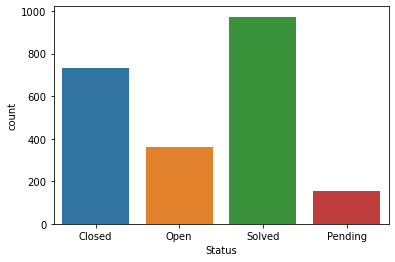

In [167]:
sns.countplot(x='Status',data=comcast_data)

Before replacing status we can see above graph

In [206]:
for status in comcast_data['Status']:
    if(status=='Pending'):
         comcast_data['Status']=comcast_data['Status'].replace(to_replace=status,value='Open')
    elif(status=='Solved'):
        comcast_data['Status']=comcast_data['Status'].replace(to_replace=status,value='Closed')
    

In [207]:
comcast_data['Status'].value_counts()

Closed    1707
Open       517
Name: Status, dtype: int64

After replacing Open and Pending Status with Open and Closed and Solved Status with Closed you can see below graph

<AxesSubplot:xlabel='Status', ylabel='count'>

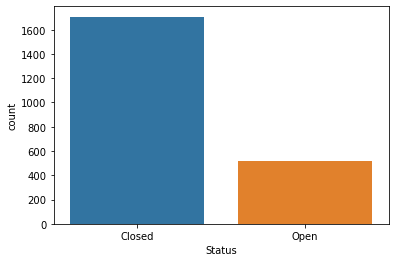

In [172]:
sns.countplot(x='Status',data=comcast_data)

In [178]:
comcast_data[comcast_data['Status']=='Open']

,Ticket #,Customer Complaint,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,year,month,day
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015,7,5
6,361148,Throttling service and unreasonable data caps,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Open,No,2015,6,24
9,371214,Comcast Raising Prices and Not Being Available...,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,2015,6,28
12,339282,Comcast Violating Open Internet Rules by Block...,4:03:18 PM,Internet,Albuquerque,New Mexico,87105,Open,Yes,2015,6,13
15,370137,Internet complaint,3:25:03 PM,Customer Care Call,Albuquerqur,New Mexico,87102,Open,No,2015,6,27
...,...,...,...,...,...,...,...,...,...,...,...,...
2196,339481,Terrible internet service from Comcast,7:14:02 PM,Customer Care Call,Woodbridge,Virginia,22191,Open,No,2015,6,13
2202,305166,comcst data cap,12:34:08 AM,Customer Care Call,Woodstock,Georgia,30188,Open,Yes,2015,5,24
2208,374570,comcast cap,12:42:45 PM,Customer Care Call,Woodstock,Georgia,30188,Open,No,2015,6,30
2218,338192,"Speed throttling, speeds not at promised output",6:35:59 PM,Customer Care Call,Yorkville,Illinois,60560,Open,Yes,2015,12,6


In [179]:
comcast_data['State'].unique()

array(['Maryland', 'Georgia', 'Michigan', 'California', 'New Mexico',
       'Indiana', 'Virginia', 'Illinois', 'Pennsylvania', 'Massachusetts',
       'Oregon', 'Texas', 'New Hampshire', 'Minnesota', 'Tennessee',
       'Colorado', 'Florida', 'Alabama', 'Washington', 'New York',
       'New Jersey', 'Maine', 'Missouri', 'West Virginia', 'Montana',
       'Mississippi', 'Connecticut', 'Vermont', 'Kentucky',
       'South Carolina', 'Ohio', 'Utah', 'Delaware', 'Arkansas', 'Nevada',
       'Louisiana', 'Kansas', 'Arizona', 'North Carolina', 'Rhode Island',
       'District Of Columbia', 'District of Columbia', 'Iowa'],
      dtype=object)

<AxesSubplot:xlabel='count', ylabel='State'>

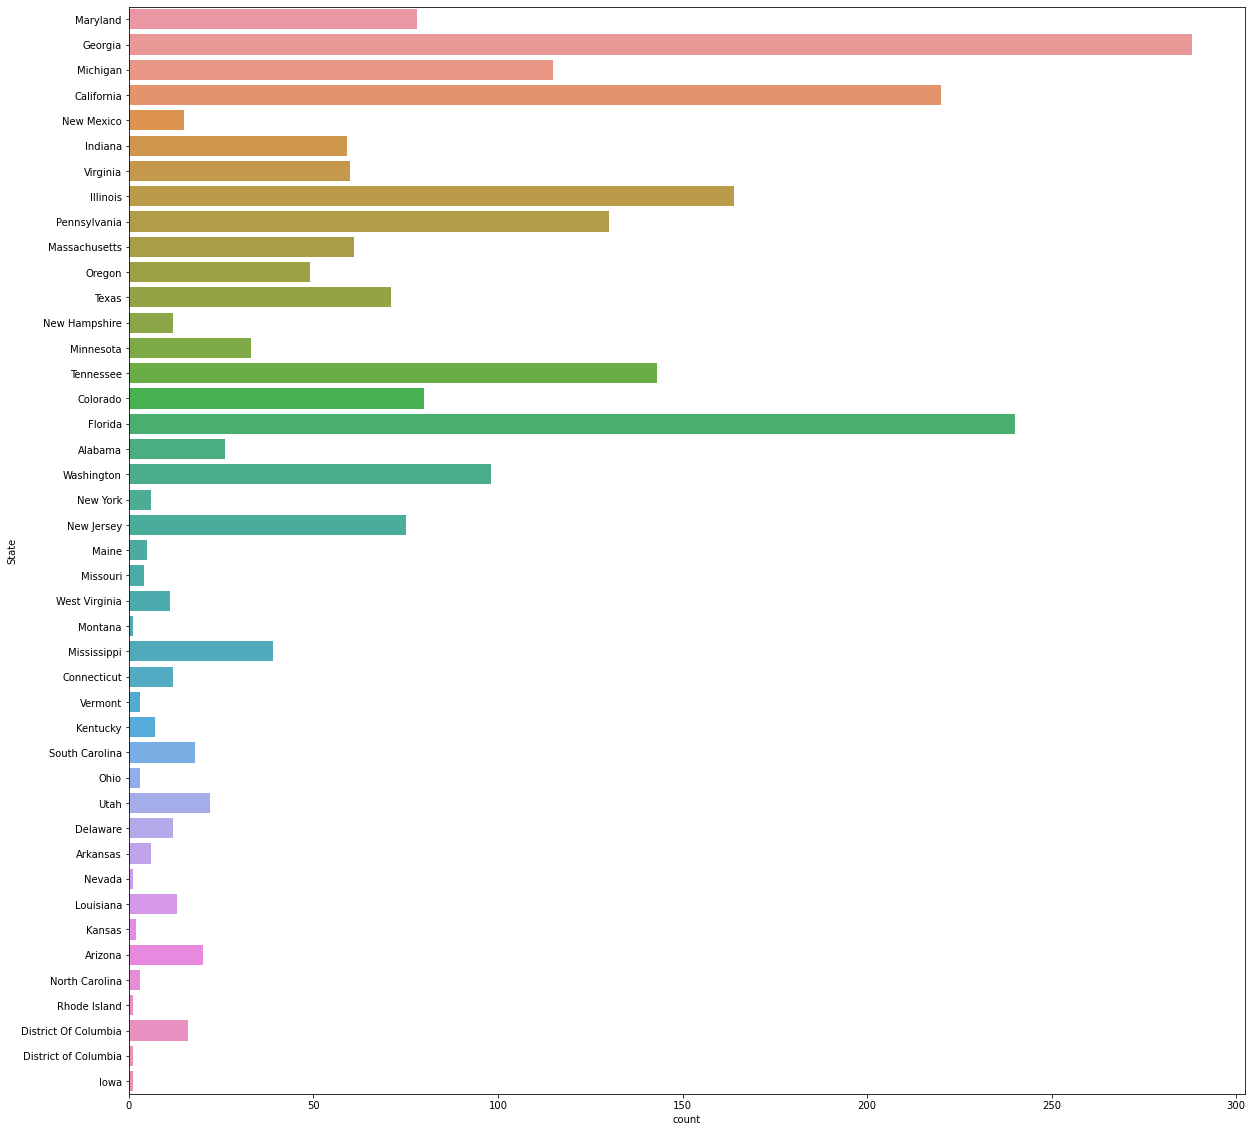

In [195]:
plt.rcParams["figure.figsize"] = (20,20)
sns.countplot(y='State',data=comcast_data)

As we can see from above graph  that GEROGIA has maximum complaints.

<AxesSubplot:xlabel='count', ylabel='State'>

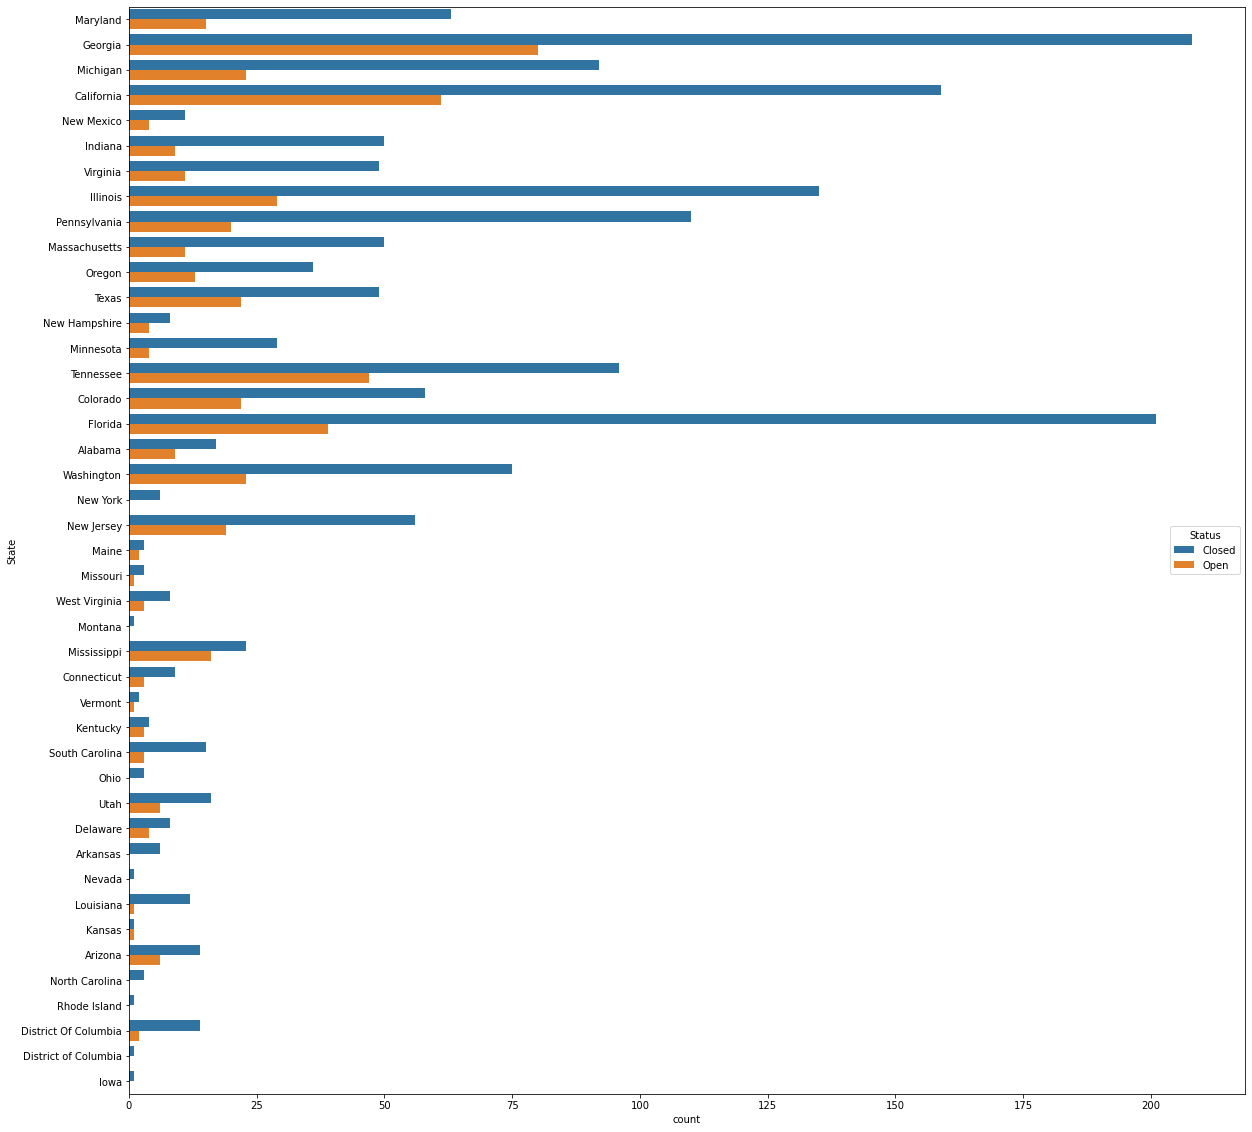

In [194]:
plt.rcParams["figure.figsize"] = (20,20)
sns.countplot(y='State',data=comcast_data,hue='Status')

As we can say from above diagram that Gerogia state has maximum number of Complaints whose Status is still Open i.e aroung 80 and 250 which is closed. and also can say that Gerogia has highest percentage of unresolved/Open complaints.

<AxesSubplot:xlabel='count', ylabel='Date'>

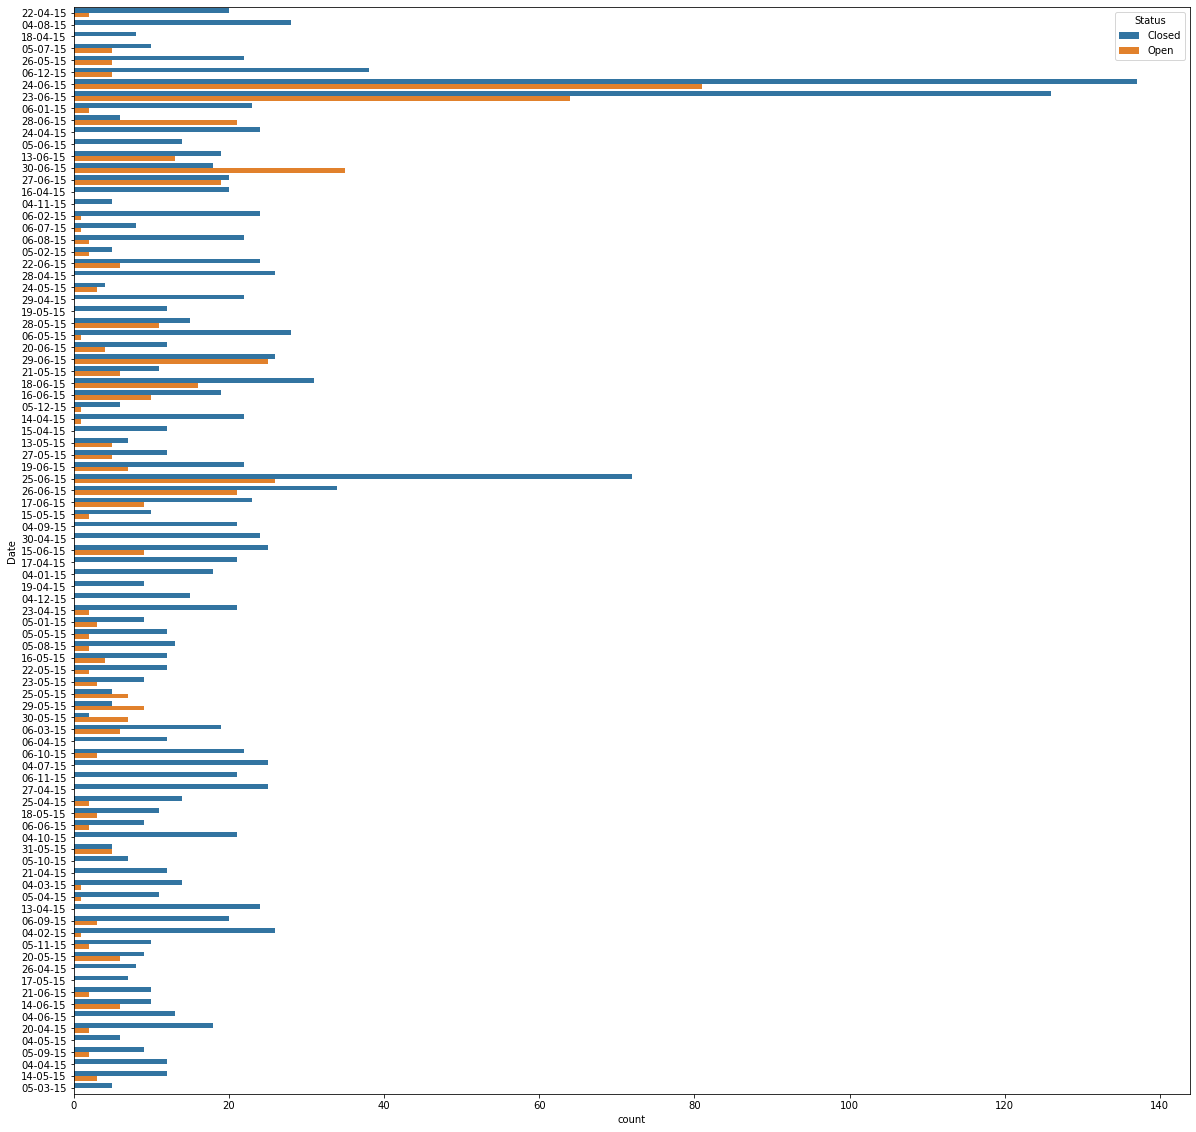

In [208]:
plt.rcParams["figure.figsize"] = (20,20)
sns.countplot(y='Date',data=comcast_data,hue='Status')

In [213]:
comcast_data['Received Via'].value_counts()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

<AxesSubplot:xlabel='Status', ylabel='count'>

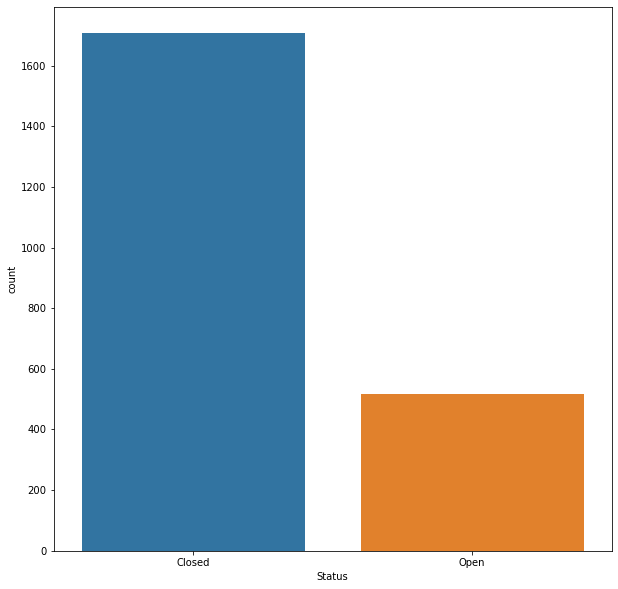

In [216]:
sns.countplot(x='Status',data=comcast_data)

From above diagram we can say that approxmately there are 500 complaints whose status are Open which are received via Customer Care call and Internet and as toatl number of complaints are 2224 hence 2224-500=1724 are those complaints which are closed and Percentage will be calculate as 1724/2224*100=77.517% of complaints resolved till date, which were received through the Internet and customer care calls.

<AxesSubplot:xlabel='Status', ylabel='count'>

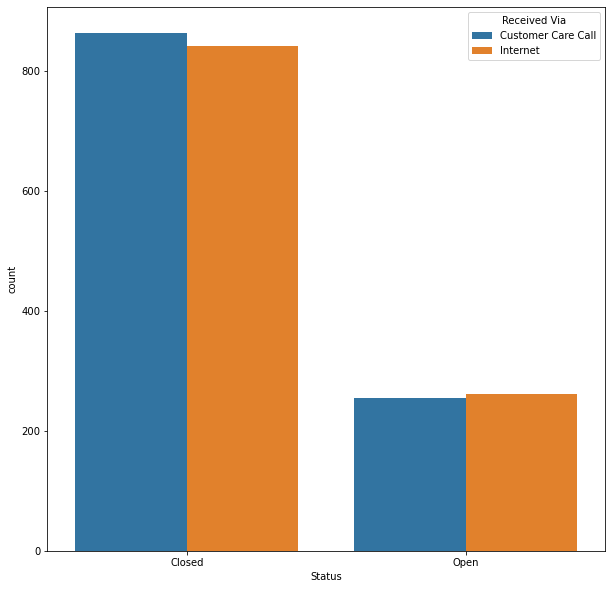

In [222]:
sns.countplot(x='Status',data=comcast_data,hue='Received Via')

From above graph we can see how many complaints are closed or open which are received via CustomerCare call or Internet with different graph.